### This is a student performance data table , we have to predict their performance.

Step_01  , IMPORTING OF LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

LOADING OF DATA FILE

In [2]:
df = pd.read_csv('Student_performance_data.csv')

In [3]:
df.shape

(2392, 15)

In [40]:
df.head(10)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0
6,1007,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2.0
7,1008,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4.0
8,1009,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2.0
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0.0


DATA DUPLICATION CHECK

In [5]:
df.duplicated().sum()

0

NULL VALUE CHECK

In [6]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [7]:
df.describe().T.round(0)

,count,mean,std,min,25%,50%,75%,max
StudentID,2392.0,2196.0,691.0,1001.0,1599.0,2196.0,2794.0,3392.0
Age,2392.0,16.0,1.0,15.0,15.0,16.0,17.0,18.0
Gender,2392.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
Ethnicity,2392.0,1.0,1.0,0.0,0.0,0.0,2.0,3.0
ParentalEducation,2392.0,2.0,1.0,0.0,1.0,2.0,2.0,4.0
StudyTimeWeekly,2392.0,10.0,6.0,0.0,5.0,10.0,14.0,20.0
Absences,2392.0,15.0,8.0,0.0,7.0,15.0,22.0,29.0
Tutoring,2392.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
ParentalSupport,2392.0,2.0,1.0,0.0,1.0,2.0,3.0,4.0
Extracurricular,2392.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


DEFINING OF FEATURES & VARIABLES

In [8]:
X = df.drop(columns='GradeClass')
y = df['GradeClass']

In [9]:
X

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297


In [10]:
y

0       2.0
1       1.0
2       4.0
3       3.0
4       4.0
       ... 
2387    0.0
2388    4.0
2389    2.0
2390    1.0
2391    1.0
Name: GradeClass, Length: 2392, dtype: float64

SAMPLING

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [13]:
X.shape, X_train.shape, X_test.shape,y.shape,y_train.shape,y_test.shape

((2392, 14), (1913, 14), (479, 14), (2392,), (1913,), (479,))

MODEL FITTING

In [15]:
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [20]:
y_pred = gbm_model.predict(X_test)

ACCURACY SCORE PREDICTION 01.TRAIN DATA

In [27]:
# accuracy on training data
y_train_prediction = gbm_model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, y_train_prediction)
print(training_data_accuracy)

0.9994772608468374


In [28]:
print('Accuracy on Training data : ', round(training_data_accuracy*100, 2), '%')

Accuracy on Training data :  99.95 %


ACCURACY SCORE PREDICTION 02.TEST DATA

In [29]:
# accuracy on test data
y_test_prediction = gbm_model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, y_test_prediction)
print(test_data_accuracy)

0.9248434237995825


In [30]:
print('Accuracy on Training data : ', round(training_data_accuracy*100, 2), '%')

Accuracy on Test data :  92.48 %


METRICS IMPLEMENTATION ON TEST DATA

In [41]:
cf_matrix = confusion_matrix(y_test,y_test_prediction)

print(cf_matrix)

[[ 12   3   3   2   1]
 [  0  49   1   3   1]
 [  2   1  74   0   1]
 [  0   4   2  76   1]
 [  4   3   2   2 232]]


<Axes: >

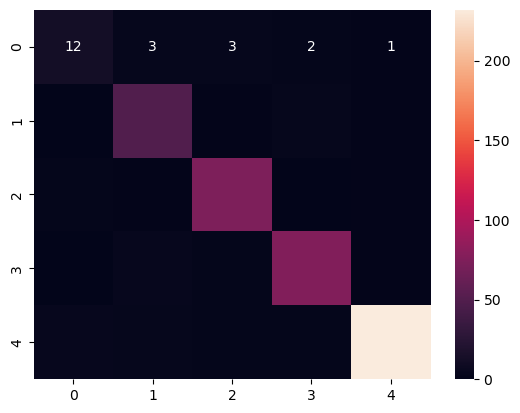

In [42]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

METRICS IMPLEMENTATION ON TRAIN DATA

In [43]:
cf_matrix = confusion_matrix(y_train,y_train_prediction)

print(cf_matrix)

[[ 86   0   0   0   0]
 [  0 215   0   0   0]
 [  0   0 312   1   0]
 [  0   0   0 331   0]
 [  0   0   0   0 968]]


<Axes: >

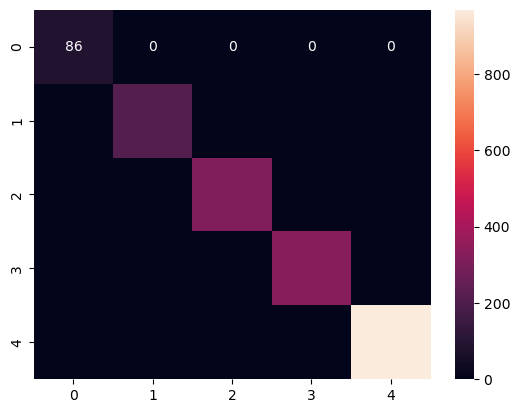

In [44]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

CLASSIFICATION REPORT -TRAIN DATA

In [37]:
print(classification_report(y_train,gbm_model.predict(X_train)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00       215
         2.0       1.00      1.00      1.00       313
         3.0       1.00      1.00      1.00       331
         4.0       1.00      1.00      1.00       968

    accuracy                           1.00      1913
   macro avg       1.00      1.00      1.00      1913
weighted avg       1.00      1.00      1.00      1913



CLASSIFICATION REPORT -TEST DATA

In [39]:
print(classification_report(y_test,gbm_model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.67      0.57      0.62        21
         1.0       0.82      0.91      0.86        54
         2.0       0.90      0.95      0.92        78
         3.0       0.92      0.92      0.92        83
         4.0       0.98      0.95      0.97       243

    accuracy                           0.92       479
   macro avg       0.86      0.86      0.86       479
weighted avg       0.93      0.92      0.92       479



From the above study we come to the conlusion that 21 students are scored higher GPA , followed by 54,78 students avearage,
83,243 students scores less GPA ,who scores who needs special care .

***************************************************DONE******************************************************************